In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [83]:
# Automated process, checks response of individuals by city:

by_city = pd.read_csv("../data/customer.csv")
train = pd.read_csv("../data/train.csv")
by_city.index = by_city["individualnumber"]
train.index = train["individualnumber"]
by_city = by_city.drop(columns="individualnumber")
train = train.drop(columns="individualnumber")
by_city = by_city.astype(object)
by_city = by_city.dropna(axis=0, subset="city_code")

results={}
results[0] = 0
for i in range(1, 82):
    city = by_city[by_city["city_code"] == i]
    merged = train.join(city)
    merged.dropna(axis=0, inplace=True)
    results[i] = 1 - merged["response"].value_counts(True)[0]

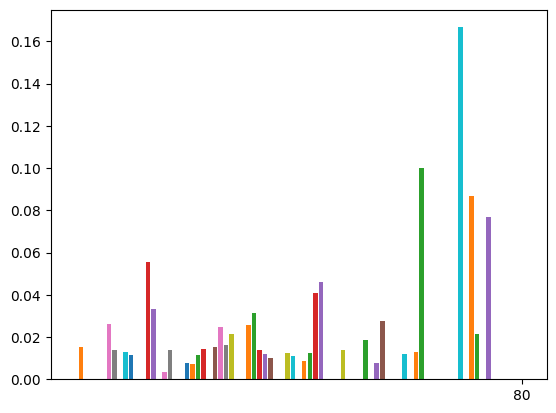

In [84]:
names = list(results.keys())
values = list(results.values())
for i in range(81):
    plt.bar(i,values[i],tick_label=names[i])
plt.xlabel = "City Code"
plt.ylabel = "Response"
plt.show()

In [5]:
# Response by gender

by_gender = pd.read_csv("../data/customer.csv")
train = pd.read_csv("../data/train.csv")
by_gender.index = by_gender["individualnumber"]
train.index = train["individualnumber"]
by_gender = by_gender.drop(columns="individualnumber")
train = train.drop(columns="individualnumber")
by_gender = by_gender.astype(object)

men = by_gender[by_gender["gender"] == "E"]
women = by_gender[by_gender["gender"] == "K"]

men_merged = train.join(men)
women_merged = train.join(women)
men_merged.dropna(axis=0, inplace=True)
women_merged.dropna(axis=0, inplace=True)

by_gender_results = {}
by_gender_results[0] = 1 - men_merged["response"].value_counts(True)[0]
by_gender_results[1] = 1 - women_merged["response"].value_counts(True)[0]

by_gender_results

{0: 0.013620071684587787, 1: 0.01163041137195775}

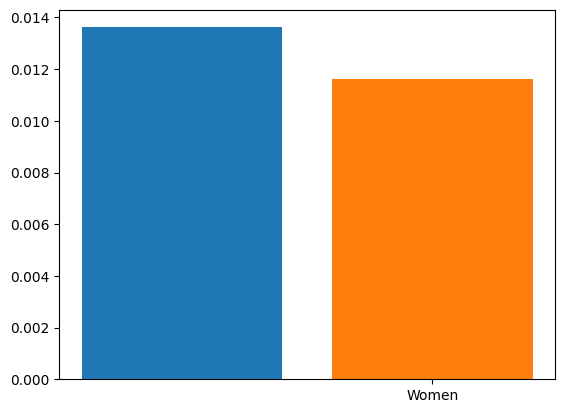

In [11]:
# Plot response for gender

names = list(by_gender_results.keys())
values = list(by_gender_results.values())

plt.bar(0,values[0],tick_label="Men")
plt.bar(1,values[1],tick_label="Women")

plt.xlabel = "City Code"
plt.ylabel = "Response"
plt.show()

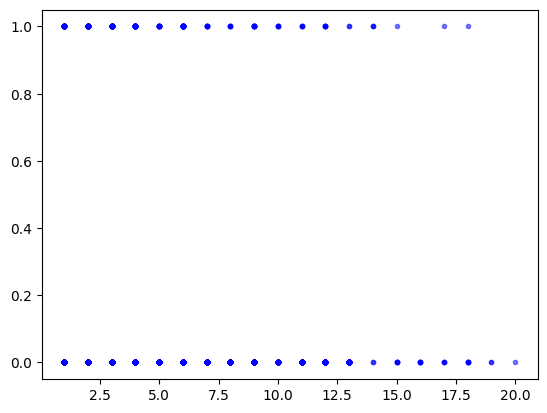

In [25]:
train = pd.read_csv("../data/train.csv")
plt.scatter(train.odul_amt, train.response, marker=".", color="blue", alpha=0.5)

In [4]:
train_df = pd.read_csv("../data/train.csv")
customer_df = pd.read_csv("../data/customer.csv")
merged = pd.merge(train_df,customer_df,how='outer',on='individualnumber')
row, column = merged.shape
merged["response"].isna().sum() / row

0.5413213024166754